## Greg Lee-Podgorski - Head of Machine Learning & Technology Platforms @ RS

# LINEAR REGRESSION - PRODUCT VIEWS' IMPACT ON REVENUE from some products

## I. Define & Scope

 **The Brief**

#### `Using historical corporate data, investigate how certain online shoppers' activities impact our revenue for those products - using the linear regression algorithm.`

i) **Intro**

In this exercise I'm going to use regression analysis to understand the how some of our web store visitors' actions affect our revenue when they are interacting with selected products while browsing on RS web store.
I am using data from our internal web analytics team. That covers purchases done in the RS UK webstore and doesn't cover OKDo and IESA brands.


 I happen to hold a position of Head of Machine Learning & Technology Platform within the Electrocomponents PLC Group (RS Components is a trading name in the UK and EMEA). Thus I am an outspoken advocate for increased use of ML in our organization and also a passionate believer in value that deploying more ML algorithms into our operations can unlock for us.
I'm hoping that by showing use cases of certain algorithms, I will lead by example and I think linear regression can be deployed in multiple use cases.

ii) **Potential application**

For any enterprise with large online footprint it will be a good idea to make better sense out of flurry of online browsing activity. Not all actions undertaken by our web store visitors are equal and not all are welcome by us.
To draw from an article by Harvard Business Review ("A Refresher on Regression Analysis", HBR November 2015), regression analysis is a way of mathematically sorting out which of those variables (i.e. webstore activities) do indeed have an impact on our revenue. It answers the questions: Which factors matter most? Which can we ignore? 
It would be beneficial for us to be in position to better explain - and dare I say it: predict - how those activities impact our bottom line. While predicting revenue in real time would be ultimate Holy Grail, we could get there in phases. Thus taking first step is important but not sufficient to get us to the finish line in that regard. 

I have selected to examine Respirators as - due to recent pandemic, big death toll and quite likely 2nd wave of infections in the fall of this year, RS could prepare our supplies better by any such return of corona virus and help save lives in the process.

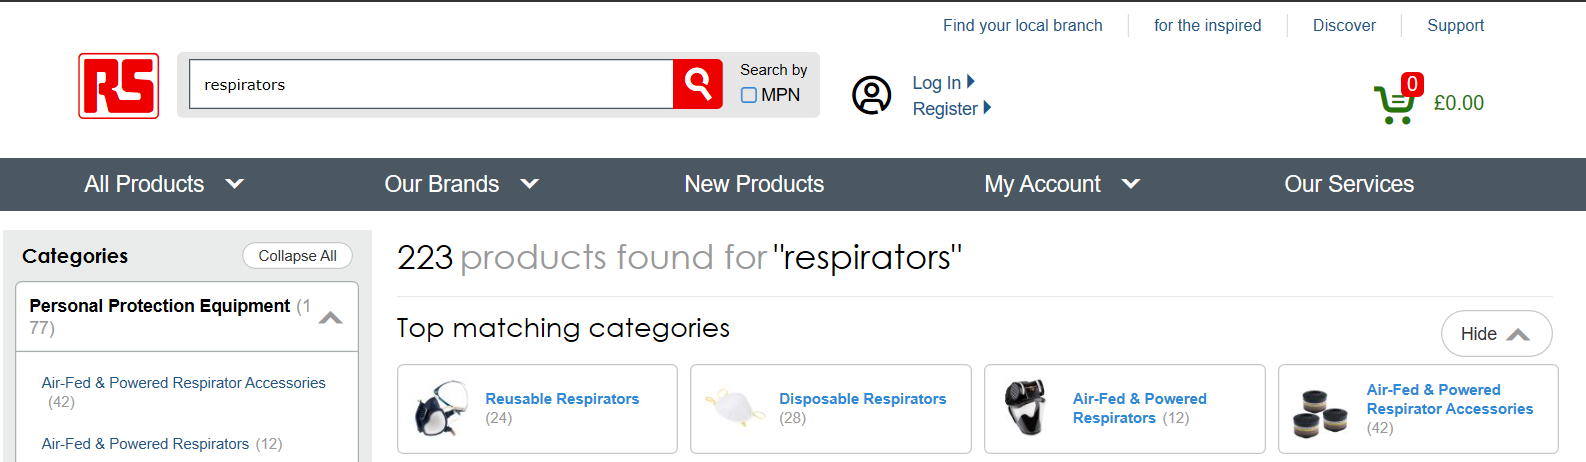

so we could be in position to recommend items for users while they shop:

This type of data, and a range of sutiable algorithms that could be trained upon it, could in theory enable RS to revolutionize how consumers discover and purchase vast range of eletrocomponents we carry in our offer.

iii) **Data**

The dataset has been sourced internally (I have been lucky enough not to need any help sourcing it) and is historical at this point in time, covering the period from start of November 2019 to end of March 2020.

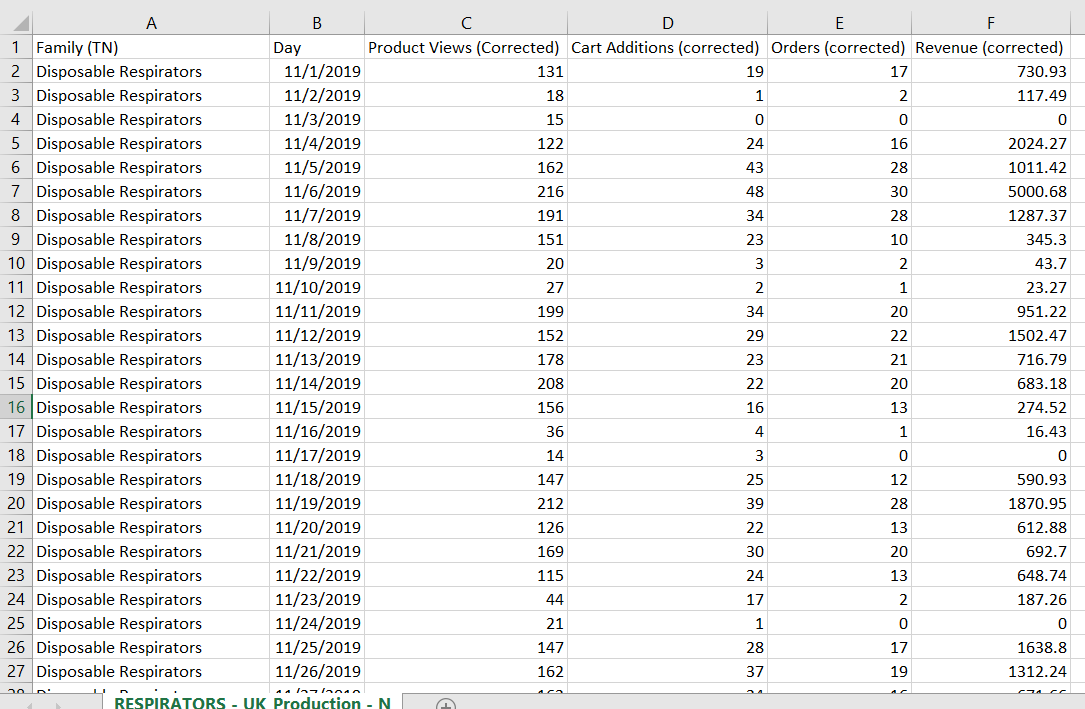

iv) **Data protection**

This is a dataset that doesn't contain any personal data, so no individual (whether actual client or just casual visitor) can be identified using any and all data points available in this dataset. 
Additionally, to protect interest of the enterprise, a column containing percentage values showing what proportion of total revenue in a given market is represented by these specific products has been stripped, no there is no way a reader could deduce how much sales of these products contributes to RS Components' bottom line. 

The dataset covers period of 5 months (start of November 2019 through end of March 2020) and contains information related to respirators as a product line, broken down into several subcategories of respirators. 

## Loading libraries

As it happens,  we will need to import several libraries and modules, such as numpy, pandas, sklearn and statsmodels to be able to conduct this exercise effectively:

In [1]:
import numpy as np # For matrix and numerical calculations; foundation of pandas
import pandas as pd # For dataframe manipulation
import matplotlib.pyplot as plt # For visualisations and plotting
from sklearn import linear_model, preprocessing # For linear regression modelling
from sklearn import metrics # For evaluating models
from sklearn.model_selection import train_test_split # For splitting the data for testing purposes
import seaborn as sns # For visualisations
import statsmodels.api as sm # For linear regression modelling
import statsmodels.formula.api as smf # For importing common formulas such as ordinary least squares
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions
import warnings; warnings.simplefilter('ignore') # For suppressing warnings

## Sourcing data

To load the data needed, we have to read in  CSV file for this:
`RESPIRATORS - UK_Production - NOV19-MAR20`.
Since this file contains relatively small number of records, there is no need to limit it to first X rows.

In [2]:
ukrespirators = pd.read_csv(r"C:\Greg_rs\RS Data Acacemy Decoded\DATA\RESPIRATORS - UK_Production - NOV19-MAR20.csv")

In [3]:
ukrespirators.head(6)

,Family (TN),Day,Product Views (Corrected),Cart Additions (corrected),Orders (corrected),Revenue (corrected)
0,Disposable Respirators,11/1/2019,131,19,17,730.93
1,Disposable Respirators,11/2/2019,18,1,2,117.49
2,Disposable Respirators,11/3/2019,15,0,0,0.00
3,Disposable Respirators,11/4/2019,122,24,16,2024.27
4,Disposable Respirators,11/5/2019,162,43,28,1011.42
5,Disposable Respirators,11/6/2019,216,48,30,5000.68


## Exploring, Cleaning and Transforming data

 Let's first have a quick look at what type data and its shape we are dealing with...

### Exploring

In [4]:
ukrespirators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Family (TN)                 460 non-null    object 
 1   Day                         458 non-null    object 
 2   Product Views (Corrected)   460 non-null    int64  
 3   Cart Additions (corrected)  460 non-null    int64  
 4   Orders (corrected)          460 non-null    int64  
 5   Revenue (corrected)         460 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 21.7+ KB


It looks like the dates are not in datetime format but are "seen" instead by Python as strings.

In [5]:
ukrespirators.shape

(460, 6)

 What's apparent is that we have have majority (4 columns) with numerical records and remaining 2 columns containing categorical values.

In [6]:
#Checking statistical summary:
ukrespirators.describe()

,Product Views (Corrected),Cart Additions (corrected),Orders (corrected),Revenue (corrected)
count,460.000000,460.000000,460.000000,460.000000
mean,1527.110870,202.265217,27.471739,3510.595457
std,6443.312126,684.635398,107.746603,13433.401733
min,1.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,0.000000,0.000000
50%,137.000000,10.500000,3.000000,388.325000
75%,398.500000,43.000000,16.000000,1354.262500
max,86993.000000,6502.000000,1350.000000,157739.310000


In [7]:
#Checking if there are any null values:
ukrespirators.isna().sum()

Family (TN)                   0
Day                           2
Product Views (Corrected)     0
Cart Additions (corrected)    0
Orders (corrected)            0
Revenue (corrected)           0
dtype: int64

We can see that the only null values are in the column "Day" so we need to do minor pre-cleaning. Since it happens to be just totals (count of values in other columns), there is absolutely no harm in dropping those 2 blank rows.

#### isnull() and isna() functions in pandas can be used interexchangeably as they both check for any NaN values in dataframe. Though isna() is probably used more commonly, since other similar functions having to do with NA exist - e.g. dropna(), fillna()

In [8]:
ukrespirators=ukrespirators.dropna(subset = ['Day'])

 We could use `df.dropna(subset = ['column1_name', 'column2_name', 'column3_name'])`, if there were multiple columns with NaN's in them.


In [9]:
ukrespirators.sample(5)

,Family (TN),Day,Product Views (Corrected),Cart Additions (corrected),Orders (corrected),Revenue (corrected)
292,Reusable Respirators,3/18/2020,1739,128,25,3589.80
252,Reusable Respirators,2/7/2020,707,102,30,2086.11
386,Air-Fed & Powered Respirators,1/18/2020,8,0,0,0.00
345,Air-Fed & Powered Respirators,12/8/2019,5,0,0,0.00
58,Disposable Respirators,12/29/2019,18,4,0,0.00


 Something like df = **`df[df['Product Name'].notna()]`** would most likely do the trick, too.

In [10]:
ukrespirators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Family (TN)                 458 non-null    object 
 1   Day                         458 non-null    object 
 2   Product Views (Corrected)   458 non-null    int64  
 3   Cart Additions (corrected)  458 non-null    int64  
 4   Orders (corrected)          458 non-null    int64  
 5   Revenue (corrected)         458 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 25.0+ KB


We should have now got the point where we don't have any blanks to worry about.

Let's check now if we haven't missed any NaN values:

In [11]:
ukrespirators.isnull().sum()

Family (TN)                   0
Day                           0
Product Views (Corrected)     0
Cart Additions (corrected)    0
Orders (corrected)            0
Revenue (corrected)           0
dtype: int64

Let's see now what are the most commonly ordered products:

In [12]:
#grouping by Family and then adding up orders:
print(ukrespirators.groupby(by=["Family (TN)"])["Orders (corrected)"].sum())

Family (TN)
Air-Fed & Powered Respirators     176
Disposable Respirators           8323
Reusable Respirators             2700
Name: Orders (corrected), dtype: int64


Looks like disposable respirators were by far the most popular group. I'm not quite sure what the subtle difference is between Powered and Reusable respirators but we can see that the Air-Fed & Powered Respirators is the smallest subset.

Since several of the column names has confusing parenthesis () in their names, let's rename the columns to make it easier to work with them:

In [13]:
ukrespirators.columns = ukrespirators.columns.str.replace("[()]", "_")

In [14]:
ukrespirators.tail()

,Family _TN_,Day,Product Views _Corrected_,Cart Additions _corrected_,Orders _corrected_,Revenue _corrected_
455,Air-Fed & Powered Respirators,3/27/2020,255,6,3,1546.99
456,Air-Fed & Powered Respirators,3/28/2020,208,6,0,0.00
457,Air-Fed & Powered Respirators,3/29/2020,149,5,1,374.98
458,Air-Fed & Powered Respirators,3/30/2020,285,5,0,0.00
459,Air-Fed & Powered Respirators,3/31/2020,222,7,1,374.98


We got rid of the brackets. But we still have underscores and "corrected" to deal with. Could have done it in one go but we might as well do it in 2 separate steps.

In [15]:
# replacing "corrected" string; The square brackets are used to demarcate a range of characters you want extracted;
## e.g. r"[Nn]ational" will get rid of both occurences where we have "National" and "national" i.e it extracts N or n
ukrespirators.columns = ukrespirators.columns.str.replace(r"_[Cc]orrected_", "")

In [16]:
ukrespirators.sample(3)

,Family _TN_,Day,Product Views,Cart Additions,Orders,Revenue
31,Disposable Respirators,12/2/2019,115,22,11,1116.82
81,Disposable Respirators,1/21/2020,599,85,27,3239.55
425,Air-Fed & Powered Respirators,2/26/2020,113,6,0,0.00


Last thing we need to do is t convert variables in Day column to correct format:

In [17]:
ukrespirators['Day'] =  pd.to_datetime(ukrespirators['Day'], format = "%m/%d/%Y", errors='coerce')

I had been having some problem with conversion and getting error but ultimately adding parameter errors='coerce' did the trick.

In [18]:
ukrespirators.head(3)

,Family _TN_,Day,Product Views,Cart Additions,Orders,Revenue
0,Disposable Respirators,2019-11-01,131,19,17,730.93
1,Disposable Respirators,2019-11-02,18,1,2,117.49
2,Disposable Respirators,2019-11-03,15,0,0,0.00


In [19]:
# Re-checking if we have changed data type correctly to datetime:
ukrespirators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 459
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Family _TN_      458 non-null    object        
 1   Day              456 non-null    datetime64[ns]
 2   Product Views    458 non-null    int64         
 3   Cart Additions   458 non-null    int64         
 4   Orders           458 non-null    int64         
 5   Revenue          458 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 25.0+ KB


 Yes, success.

### Visualizing the relationships:

Let's first set the color palette for seaborn:

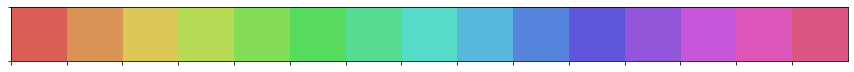

In [20]:
sns.palplot(sns.color_palette("hls", 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001100547ADC8>]],
      dtype=object)

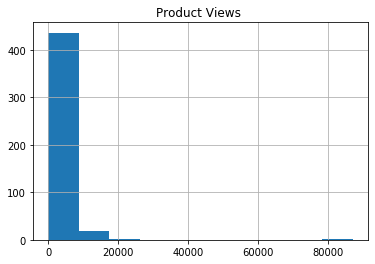

In [21]:
# Seeing histogram of Product Views:
ukrespirators.hist(column='Product Views ')

It's definitely not the normal distribution. We can see that the mass of distribution is concentrated to the left. That means positive skew.

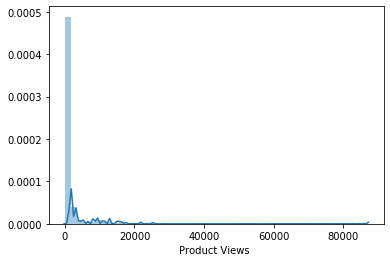

In [22]:
# Let's confirm it by using seaborn and distplot function:
views = ukrespirators['Product Views ']
sns.distplot(views)

Now the skew is even more obvious. When the tail is distribution is much longer on the right, we can also call it right-tailed or right-skewed distribution.

Btw, I have discovered I have spaces in the column names so to avoid strange errors down the road, I'm gonna assign new labels to columns, without guessing where and how many spaces there are:

In [23]:
ukrespirators.columns = ['Family', 'Day', 'Product Views', 'Cart Additions', 'Orders', 'Revenue']

In [24]:
ukrespirators.head(3)

,Family,Day,Product Views,Cart Additions,Orders,Revenue
0,Disposable Respirators,2019-11-01,131,19,17,730.93
1,Disposable Respirators,2019-11-02,18,1,2,117.49
2,Disposable Respirators,2019-11-03,15,0,0,0.00


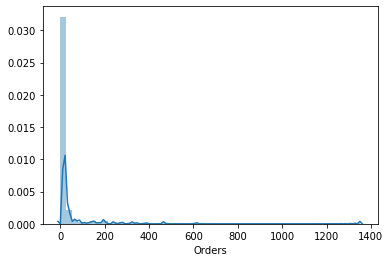

In [25]:
#Plotting distribution of Orders:
views2 = ukrespirators['Orders']
sns.distplot(views2)

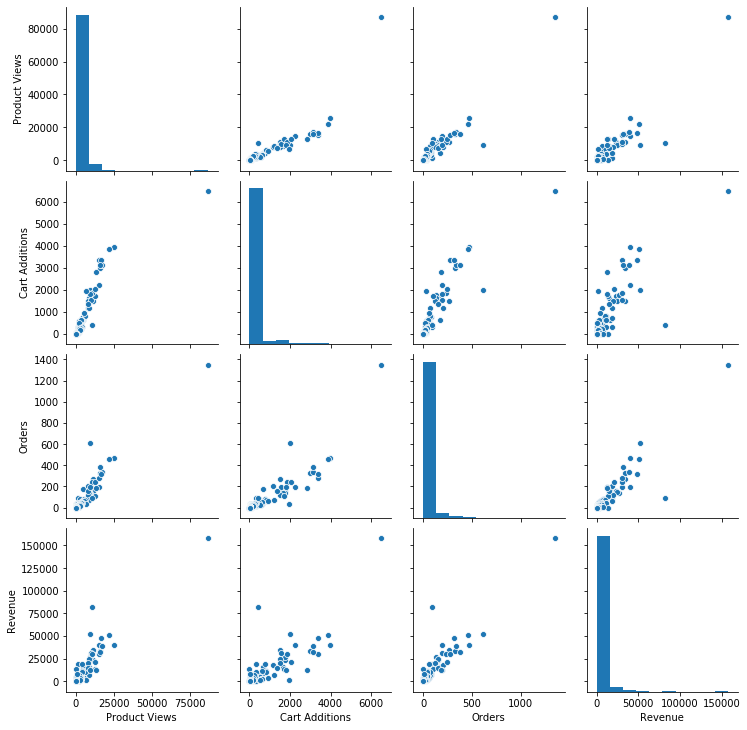

In [26]:
# Create a pairplot to visualise the relationships between our variables & the distributions of our data
sns.pairplot(ukrespirators)

We can see that in majority of variable pairings, data points converge to what could be mentally drawn regression line.

It's not awfully surprising to see very nice distribution of observations along imaginary (for now) line in case of pair Orders vs Revenue. The same can be said about Cart Additions and Orders. It will be interesting to further dive into how Product Views affect Cart Additions and Revenue and how closely connected are Cart Additions and Revenue...

Let's now dive deeper and examine the same relationships but this time on more granular level - with subcategories of respirators:

In [27]:
# obtaining all unique values in Respirators column:
ukrespirators['Family'].unique()

array(['Disposable Respirators', 'Reusable Respirators',
       'Air-Fed & Powered Respirators'], dtype=object)

We can clearly see that there 3 distinct subcategories of Respirators: 
Disposable Respirators, 
Reusable Respirators and
Air-Fed & Powered Respirators

In [28]:
#Filtering Family column to only retain Disposable Respirators:
ukrespirators_disp=ukrespirators[ukrespirators['Family']=='Disposable Respirators']

In [29]:
ukrespirators_disp.head()

,Family,Day,Product Views,Cart Additions,Orders,Revenue
0,Disposable Respirators,2019-11-01,131,19,17,730.93
1,Disposable Respirators,2019-11-02,18,1,2,117.49
2,Disposable Respirators,2019-11-03,15,0,0,0.00
3,Disposable Respirators,2019-11-04,122,24,16,2024.27
4,Disposable Respirators,2019-11-05,162,43,28,1011.42


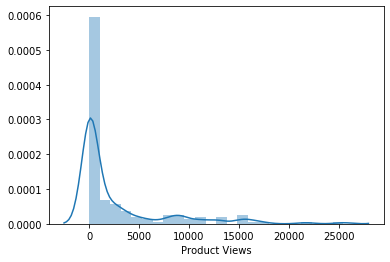

In [30]:
# checking Product Views distribution just for Disposable Respirators:
views2 = ukrespirators_disp['Product Views']
sns.distplot(views2)

We can see that in this case the tail is even longer, with outliers further to the right.

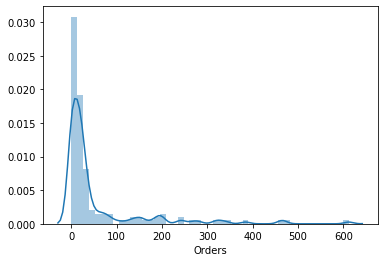

In [31]:
# Inspecting Orders distribution just for Disposable Respirators:
views2 = ukrespirators_disp['Orders']
sns.distplot(views2)

In the case of Disposables, vast majority of orders had less than 50 items per order.

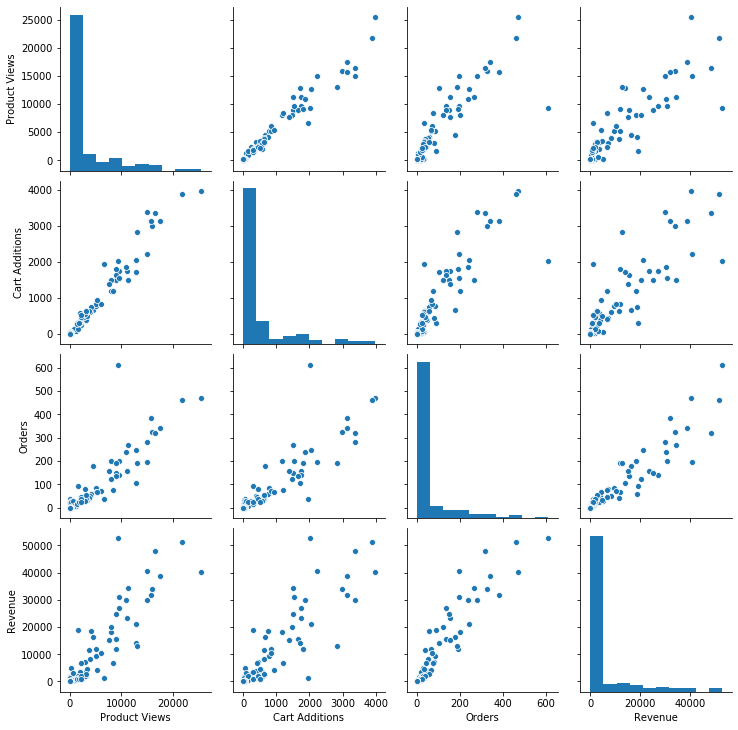

In [32]:
# Create a pairplot to visualise the relationships between our variables & the distributions of our data
sns.pairplot(ukrespirators_disp)

We can observe that with Disposable Respirators, Product Views translated more reliably into Cart Additions and Cart Additions - into Orders. This probably has to do with the fact there is less financial commitment in buying disposable products as they tend to be cheaper. Ditto with risk of buying wrong product - it's lower because in case of wrong order, it's easier to order another one or something else altogether.

Let's visualize the pairplots for 2 remaining subcategories of Respirators:

In [33]:
#Filtering Family column to only retain Reusable Respirators:
ukrespirators_reu=ukrespirators[ukrespirators['Family']=='Reusable Respirators']

In [34]:
ukrespirators_reu.head(3)

,Family,Day,Product Views,Cart Additions,Orders,Revenue
153,Reusable Respirators,NaT,86993,6502,1350,157739.31
154,Reusable Respirators,2019-11-01,130,13,11,692.16
155,Reusable Respirators,2019-11-02,28,0,0,0.00


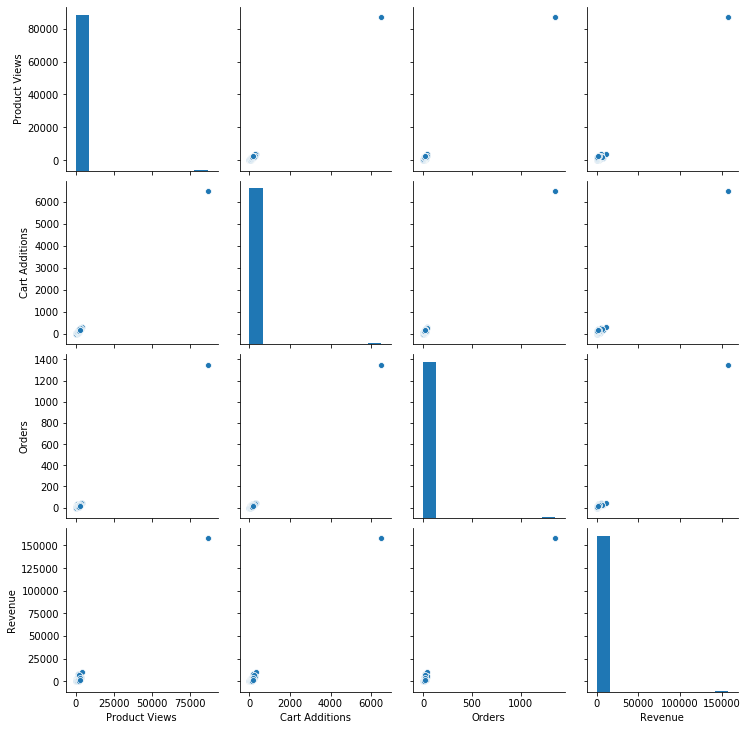

In [35]:
# Create a pairplot to visualise the relationships between our variables & the distributions of our data for Reusable Respirators subcategory:
sns.pairplot(ukrespirators_reu)

It doesn't appear there were many orders of Reusable Respirators (possibly matters of hygiene and reliability weighed heavily here).

In [36]:
#Filtering Family column to only retain Reusable Respirators:
ukrespirators_pow=ukrespirators[ukrespirators['Family']=='Air-Fed & Powered Respirators']

In [37]:
ukrespirators_pow.tail()

,Family,Day,Product Views,Cart Additions,Orders,Revenue
455,Air-Fed & Powered Respirators,2020-03-27,255,6,3,1546.99
456,Air-Fed & Powered Respirators,2020-03-28,208,6,0,0.00
457,Air-Fed & Powered Respirators,2020-03-29,149,5,1,374.98
458,Air-Fed & Powered Respirators,2020-03-30,285,5,0,0.00
459,Air-Fed & Powered Respirators,2020-03-31,222,7,1,374.98


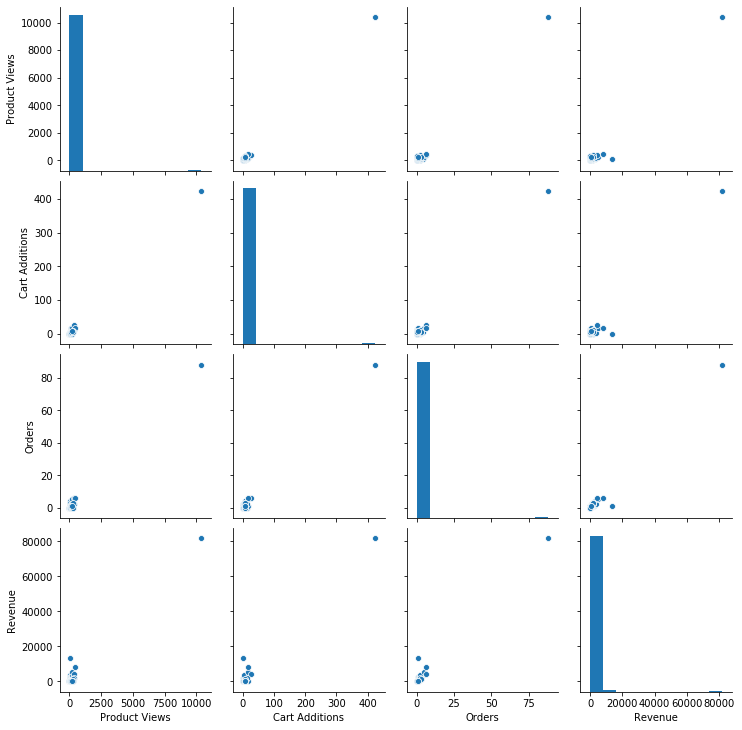

In [38]:
# Create a pairplot to visualise the relationships between our variables & the distributions of our data for Air-Fed & Powered Respirators subcategory:
sns.pairplot(ukrespirators_pow)

Looks like there was slightly more interest in Powered Respirators than in Reusable ones and a line could still be drawn between data points.

 Pairplots are visually appealing, but they're slow, not ideal for large datasets, and bombard us with a lot of information.
 
That said, we can use them today to point us in the right direction of better understanding the relationships in the dataset. 

On the main diagonal, we can see a different kind of chart compared to the rest of the plot. Because it doesn't make sense to plot the correlation of a variable with itself (there's no new information to be found there - it will be perfectly correlated) the plots instead show a distribution of values for each column, so that one can check the shape of every distribution and/or immediately spot if you have low-variability columns 

#### Correlations:

Let's now examine correlations between variables in the main category and across subcategories of Respirators:

In [39]:
# Display the same correlation information numerically instead of visually
ukrespirators.corr()

,Product Views,Cart Additions,Orders,Revenue
Product Views,1.000000,0.899411,0.949901,0.922503
Cart Additions,0.899411,1.000000,0.907636,0.845739
Orders,0.949901,0.907636,1.000000,0.923865
Revenue,0.922503,0.845739,0.923865,1.000000


Let's visualize those correlations in form of a heatmap:

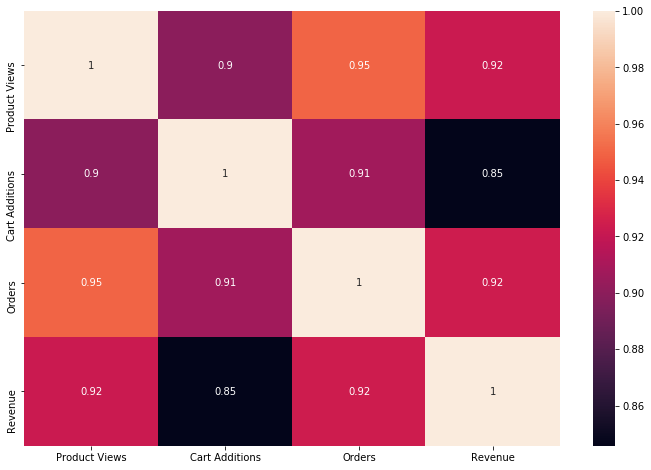

In [40]:
# Ensuring the plot displays in a large enough size to be readable
plt.figure(figsize=(12,8))

# Create an annotated heatmap of the correlations. The "annot" parameter tells the plot to display labels
sns.heatmap(ukrespirators.corr(), annot=True)

Heatmap for Disposable Respirators:

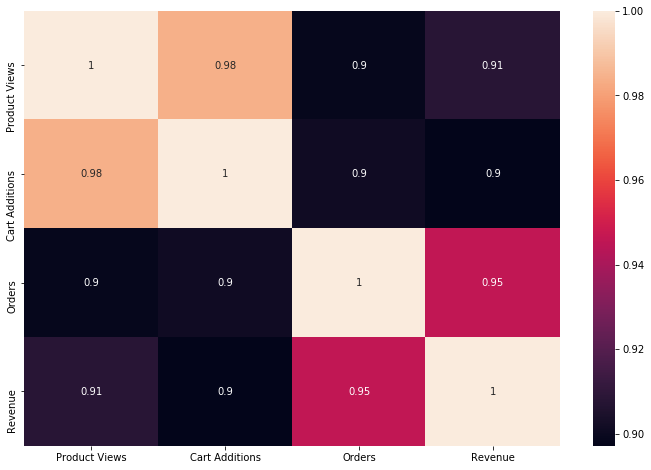

In [41]:
# Ensuring the plot displays in a large enough size to be readable
plt.figure(figsize=(12,8))

# Creating an annotated heatmap of the correlations for Disposables:
sns.heatmap(ukrespirators_disp.corr(), annot=True)

Heatmap for Reusable Respirators:

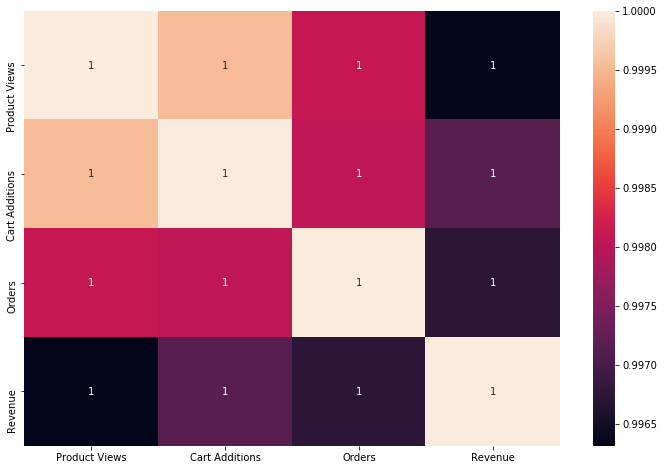

In [42]:
# Ensuring the plot displays in a large enough size to be readable
plt.figure(figsize=(12,8))

# Creating an annotated heatmap of the correlations for Reusables:
sns.heatmap(ukrespirators_reu.corr(), annot=True)

Hmm, all correlation values seem to be converging around 1. let's double check if that's correct:

In [43]:
ukrespirators_reu.corr()

,Product Views,Cart Additions,Orders,Revenue
Product Views,1.000000,0.999530,0.998112,0.996313
Cart Additions,0.999530,1.000000,0.998056,0.997153
Orders,0.998112,0.998056,1.000000,0.996744
Revenue,0.996313,0.997153,0.996744,1.000000


It looks like there were no mistakes in data/code. One possible explanation coming to mind is very low activity (views, additions, orders) on reusables so small data subset.

 Heatmap for Air-Fed & Powered Respirators:

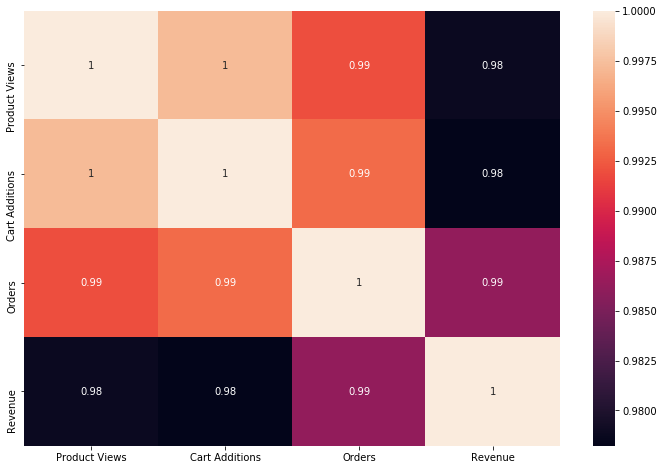

In [44]:
# Ensuring the plot displays in a large enough size to be readable
plt.figure(figsize=(12,8))

# Creating an annotated heatmap of the correlations for Air-Fed & Powered Respirators:
sns.heatmap(ukrespirators_pow.corr(), annot=True)

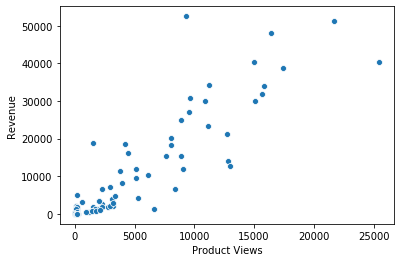

In [45]:
# Plot "Product Views" against "Revenue"
sns.scatterplot(x='Product Views', y='Revenue', data=ukrespirators_disp)

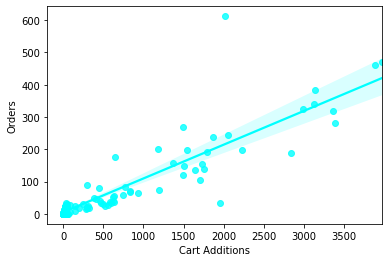

In [46]:
# Create a regplot to make the correlation more clear in Disposable Respirators subcategory:
sns.regplot(x='Cart Additions', y='Orders', data=ukrespirators_disp, color='cyan')

The line has nice slope and most of the data points converge along the reg line but we can see some outliers.

 **We can also observe some degree of homoscedasticity** - which is a statistical term denoting absence of differences in dispersion of variables (good measure of which would be variance). There are few variables that display a complementary property - heteroscedasticity (e.g. blue dot with y value of around 600) but those are very infrequent.

## Build model - Linear Regression:

There is little sense in running algorithm on variables where correlations seems to be near perfect (close to 1) - even if it's mainly due to v. low number of records. It's much more interesting to see what our model will bring to light once we look at less obvious (to naked eye) relationships between variables.

##  Linear Regression - Sklearn & Statsmodels:
There are two primary libraries that are used to run linear regression in Python. The first is the `sklearn` library, which was created by people with an eye towards computer programming. The second is the `statsmodels` library. This library was created by statisticians, so the resulting output after running a model looks different than that of `sklearn`. We'll run and interpret the results of linear regression models using both libraries today, however both use the same maths underneath the hood to get to the final product (we will use the Ordinary Least Squares (OLS) method today with both).

### Univariate linear regression using Sklearn:


##### Preparing the Data
Before we run a linear regression model, we'll first prepare our data so that it's in the proper format. To begin, we'll create smaller datasets that consist of just our dependent variable (Revenue) and our single independent variable (Product Views). `The double brackets around the variables allow us to keep the column heading when we extract them for the analysis.`

After we've done this, we split out data into test and training datasets. We do this in order to validate our model; if we don't do this, we have no way of knowing whether the model is accurate or if it is an overall good representation of the data we have. By splitting the data this way, we can apply a model that's been trained on known data and then apply it to data never seen before.

In [47]:
# Creating smaller datasets consisting of just our dependent and independent variables
X = ukrespirators[['Product Views']] 
y = ukrespirators[['Revenue']]

# Splitting the data 
# test_size means we'll train with 75% of the data and test on 25%, while random_state allows our work to be replicated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [48]:
# Checking that the sizes match between the test and training datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(343, 1) (343, 1)
(115, 1) (115, 1)


We can see that there is equal number of rows across Product Views and Revenue and that ratio of training to test data is almost 3:1

##### Analysing the Data:
Now that we've split our data up into appropriate chunks, we can run our linear regression model using `sklearn`'s `LinearRegression` function. Here, the OLS method is fitting multiple lines with various slopes and intercepts on the data that we already have in order to find the optimal line that best fits our data with the least amount of error possible. 

In [49]:
# Create the model; The normalise parameter allows us to deal with the different scales of our variables
model = linear_model.LinearRegression()

In [50]:
# Training the model on our data:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After we've done this, we can look at our R2 - the "coefficient of determination" - to see how much how much variation our model is explaining. Essentially, it is a measure of how well our model predicts the variations in the data away from the mean. An R2 of 1 would would mean we have a perfect model that explains 100% of the variation, while an R2 of 0 would mean our model explains 0% of the variation. 

In [51]:
# Evaluating the model by obtaining our R2 (R-squared):
print(model.score(X_train, y_train))

0.8619139684640437


Here, our model explains more than 86% of the variation from the mean. In more "mathemathical" terms, the R2 is the fraction of the total sum of squares that is explained by the regression model (or the ESS/TSS).

The next thing we can look at is the y-intercept (or the B<sub>0</sub> from our linear regression equation) and the coefficients (the B<sub>1</sub> or slope from our linear regression equation) from our model. The `sklearn` library let's you extract these features using `intercept_` and `coef_`.

In [52]:
# Take a look at the coefficients from the model
print(model.intercept_, model.coef_)

[508.02061423] [[2.02091848]]


Whereas the output from some statistical methods are hard to make sense of, linear regression is much friendlier because of its interpretability. Recall that the y-intercept is the point where the line of best fit crosses the y-axis. In our case, the value of £508.02 for the y-intercept is the expected mean value of Y (or Revenue) when Product Views = 0. To interpret the coefficient value, one could say that a 1 unit increase in the Product Views variable results in an increase of £2.02 spent online. 

**In other words for each additional product viewed in our RS web store, revenue is expected to increase by slightly over 2 GBP.**

Let's put this information into a pandas dataframe object named `sklearn_results` so that it's easier to read (and might be helpful if one were run multivariate linear regression).

In [53]:
# Putting information from our model into a nice table to interpret
sklearn_results = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])

In [54]:
sklearn_results

,Coefficient
Product Views,2.020918


Now that we've trained our model on our training data, we're ready to use that model to make predictions using data the model hasn't seen before (the test data): 

In [55]:
# Using the model to make predictions using our test data
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Revenue')

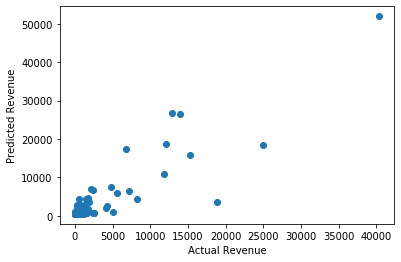

In [56]:
# Let's plot the predictions against the actual data we've already observed
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

The above scatterplot shows how well the predictions we just generated match the actual data we have in our dataset for `Revenue` . Along the x-axis, we have the actual Revenue and along the y-axis we have the predictions (expected revenue).

There is a visible positive correlation, which indicates that the model has been - to some degree successful. That said, it's clear that it is not incredibly accurate - products views that actually generated £40,000 online have been predicted as generating £50K+ and there are other various outliers and inaccuracies present as well. 

##### EvaluatIng the Sklearn Model:

After we've generated our predicted values, we can evaluate how well we've done on our testing data using a few different metrics. While each of these can get mathematically complicated to calculate by hand, the sklearn library computes them for us.


The Mean Absolute Error(MAE) and the Mean Squared Error (MSE) are similar in interpretation, despite different calculations and how they treat outliers. The MAE calculates a residual for every data point and takes the absolute value of each so that negative and positive residuals do not cancel out. Then, it takes the average of all these residuals. The MSE does the same thing, but squares the difference and then sums them all rather than relying on the absolute value. Both metrics effectively tell us how well our model predicts the data. The scores range from 0 to infinity, with smaller values indicating the model is doing a good job predicting the output, while a value of 0 means that the model is a perfect predictor of the response variable. The Root Mean Squared Error (RMSE) is the square root of the MSE. By taking the square root, the units match those of the output variable, which make interpretation a bit easier. The RMSE tells us how far, on average, our predictions were wrong from the actual values. An RMSE of 0 would mean we were making perfect predictions. Below, our RSME is 3090, which means that we are, on average, about £3100 away from the correct answer (when it comes to expected vs actual revenue).

In [57]:
# Evaluating the model now that we've used it on the test data. What do each of these tell us?
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1516.6806311777407
Mean Squared Error: 9549906.096633924
Root Mean Squared Error: 3090.2922348273028


Finally, we can calculate the difference between our predicted and actual values to get our `residuals`, or the amount of error that remains after we've made our predictions. It's worth remembering that a primary assumption of linear regression is that the residuals are normally distributed, which represent variation that isn't explained by our predictors. Below, we can plot our residuals to see if they form a normal distribution:

In [58]:
# Calculating the residuals - the error remaining when we subtract our actual data values from our predicted values
residuals = y_test - y_pred

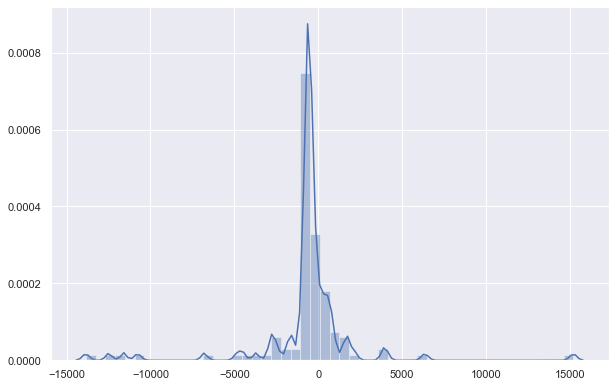

In [59]:
# Let's see if we meet the assumption that our residuals are normally distributed
sns.set(rc={'figure.figsize':(10,6.5)})
sns.distplot(residuals)

There is visible central tendency and observations are distributed relatively symmetrically though I would not call it normal distribution.

### Multivariate linear regression using Sklearn:
I've conducted our first (univariate) linear regression and found, based on various metrics, that it's not doing such a great job of predicting the revenue generated by our customer performing Product Views shopping online with RS. It stands to reason that there might be other predictors in our dataset that will help explain the  online UK Revenue from respirators that I haven't put into our model yet. Using the `sklearn` library again, I'll run another linear regression model, but this time I'll include more predictors. 

##### Preparing the Data:

In [60]:
# Creating test and train datasets again, but now we include more columns in the predictors
# Including all columns from data in X except 'Revenue' (& other non-numerical/atheoretical variables - if there had been any):
X1 = ukrespirators[['Product Views','Cart Additions', 'Orders']]
y1 = ukrespirators['Revenue']

# Splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 123)

In [61]:
# Checking the shape of the created datasets (Train n test ones):
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(343, 3) (343,)
(115, 3) (115,)


#### Analysing the Data
Like before, I'll fit our model to our training data and then obtain predictions using our testing data. I'll also evaluate how well our model does using the same metrics we used when we ran our univariate linear regression.

In [62]:
model2 = linear_model.LinearRegression()

In [63]:
model2.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Extracting R-squared score:
print(model2.score(X1_train, y1_train))

0.8811214515019896


Looks like multivariate model is around 2% points more accurate (provides slightly better explainability of the variation from the mean) than univariate version based on Product Views - when it comes to Revenue.

In [65]:
sklearn_results2 = pd.DataFrame(model2.coef_, X1.columns, columns=['Coefficient'])
print(sklearn_results2)

                Coefficient
Product Views      1.086088
Cart Additions     0.602179
Orders            52.213067


In [66]:
y1_pred = model2.predict(X1_test)

Text(0, 0.5, 'Predicted Revenue')

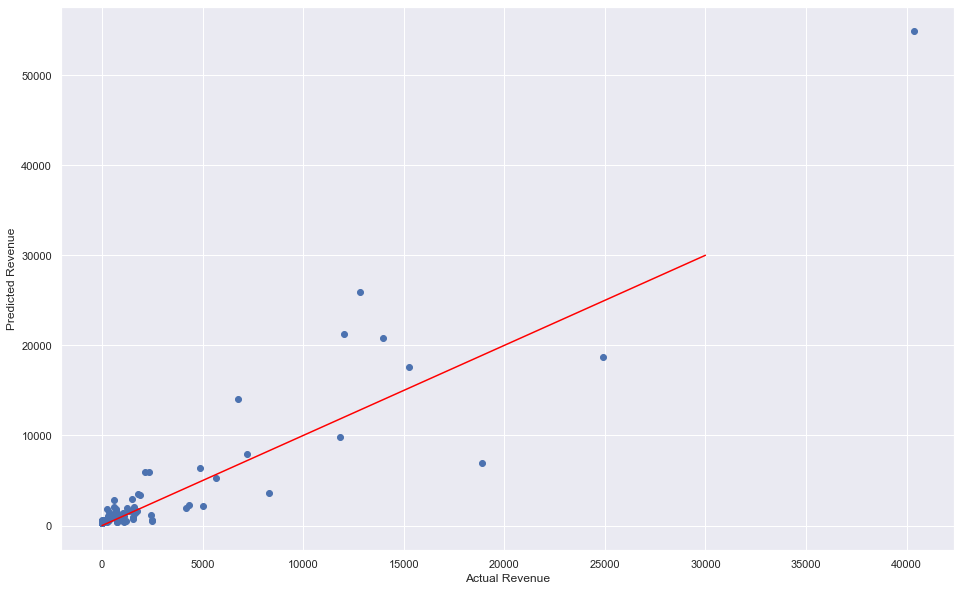

In [67]:
# Let's plot the predictions against the actual data we've already observed
plt.figure(figsize=(16,10))
plt.scatter(y1_test, y1_pred)

# Addding a line for perfect correlation
plt.plot([x for x in range(0,30000)],[x for x in range(0,30000)], color='red')

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

We've now got a bit closer match between our actual data and our predictions, and we can see that the shape of the data points is more similar to the red theoretical best fit line.

#### Evaluating the Model:

In [68]:
# Evaluating the model now that we've used it on the test data. What do each of these tell us?
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 1282.5606116104732
Mean Squared Error: 7586658.85566143
Root Mean Squared Error: 2754.3890167624163


Comparing it to the error metrics from univariate model, we can see that all 3 measures show some improvement:
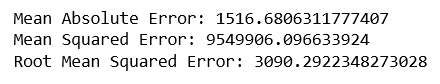

If we interpret our RMSE now, we can say that we are, on average, about £2754 away from the correct answer.

In [69]:
# Calculate residuals again and plot to see if they're normally distributed
residuals2 = y1_test - y1_pred

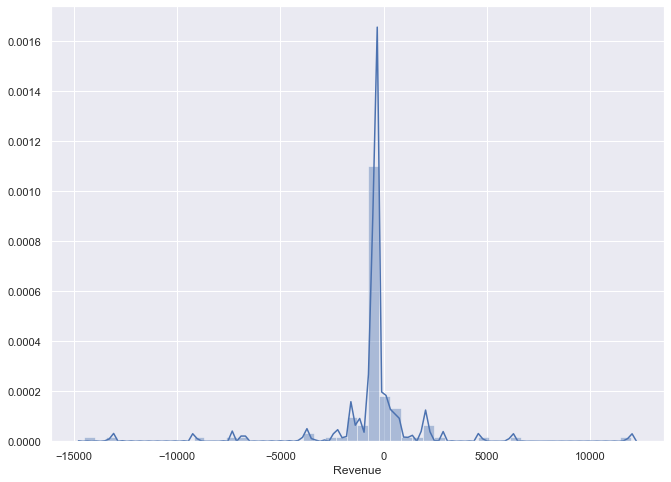

In [70]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(residuals2)

### Statsmodels - multivariate linear regression:

We're going to run our multivariate linear regression again, but this time we're going to use the `statsmodels` library and interpret the new output that it provides. While the data preparation and analysis phases are similar to what we did in `sklearn`, there are some differences, which our outlined below.

#### Preparing the Data
Unlike `sklearn`, `statsmodels` doesn't automatically include the y-intercept (also called a constant), so we'll need to add it when we create our X and y variables used in the analysis. 

In [71]:
ukrespirators.head(3)

,Family,Day,Product Views,Cart Additions,Orders,Revenue
0,Disposable Respirators,2019-11-01,131,19,17,730.93
1,Disposable Respirators,2019-11-02,18,1,2,117.49
2,Disposable Respirators,2019-11-03,15,0,0,0.00


In [72]:
# Including all columns from data in X except 'Revenue' (& any other non-numerical variables - if they had been present):
X2 = ukrespirators[['Product Views','Cart Additions', 'Orders']]

# Create constants for X, so the model knows its bounds:
X2 = sm.add_constant(X2)
y2 = ukrespirators[['Revenue']]

# Splitting the data:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 123)

In [73]:
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(343, 4) (343, 1)
(115, 4) (115, 1)


 #### Analysing the Data

In [74]:
# Creating the model:
model3 = sm.OLS(y2_train, X2_train)

# Fitting the model:
model3_results = model3.fit()

I kept getting strange "model/values not aligned" after running .summary() function. It wasn't until after I have switched y2_train with x2_train in the function above that the error disappeared!

In [75]:
# Evaluating the model:
model3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     837.5
Date:                Thu, 28 May 2020   Prob (F-statistic):          2.35e-156
Time:                        03:54:56   Log-Likelihood:                -3343.3
No. Observations:                 343   AIC:                             6695.
Df Residuals:                     339   BIC:                             6710.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            317.6759    235.070      1.351      0.177    -144.703     780.055
Product Views      1.0861      0.134      8.108      0.000       0.823       1.350
Cart Additions     0.6022      0.871      0.691      0.490      -1.112       2.316
Orders            52.2131      8.273      6.311      0.000      35.939      68.487
==============================================================================
Omnibus:                      647.345   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           454862.229
Skew:                          11.599   Prob(JB):                         0.00
Kurtosis:                     179.887   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unlike `sklearn`, `statsmodels` returns far more information after running the model. Built from a statistician's viewpoint, there are many more metrics in the output that help us evaluate model fit. the _adjusted R<sup>2</sup>_ is of bigger importance. Because your R<sup>2</sup> will either stay the same or increase with addition of more variables (even if they don't have a relationship with the dependent variable), we need a measure of model fit that isn't artificially inflated when this occurs. The adjusted R<sup>2</sup> penalizes one for adding variables that don't improve your existing model. Simply, it's an adjustment to the R<sup>2</sup> and as more non-significant variables are added into the model, the gap in R<sup>2</sup> and adjusted R<sup>2</sup> increases.

Like `sklearn` we can use our coefficients to substantively interpret the impact of our predictors on our outcome variable. We now have t and p-values, which help us assess how statistically significant our predictors are. For example, the p-value < .05 for `Product Views` suggests that there is a positive, statistically significant impact of `Product Views` on `Revenue` at the conventional 95% confidence level. While holding the other variables at their means, for a 1 unit increase in the average product view count, there is a £1.086 increase in the Revenue generated in our online store.

Finally, there are a number of statistics at the bottom of the output that help us assess whether the assumptions of OLS are being met or not. For example, the Omnibus and Prob(Omnibus) examine the skew of our residuals, which help us determine whether they are normally distributed. If the Prob(Omnibus) is close to 1, it means our residuals are more normally distributed. A high Prob(Omnibus) and low Omnibus score suggests that are data are more normally distributed than not, which bodes well for our choice to run linear regression.

#### Evaluating the model:
After we've fit the model using `statsmodels`, we can do the exact same thing we did before: we obtain our predictions, plot the actual vs. predicted values against one another, and then compute the MSE/MAE/RSME. At the end they should all match the `sklearn` models above).

In [76]:
# Making predictions using our test data, just like we did before
y2_pred = model3_results.predict(X2_test)

Text(0, 0.5, 'Predicted Revenue')

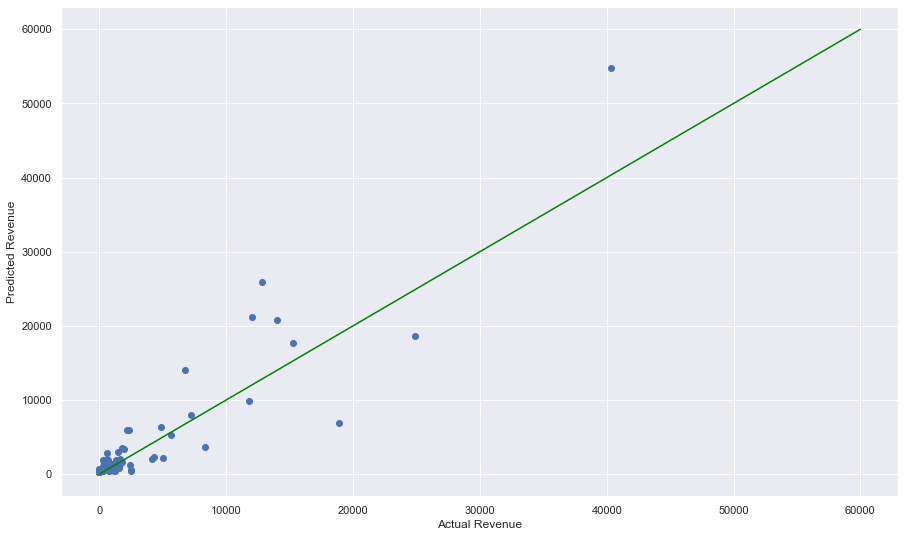

In [77]:
# Plot the predictions, just like we did before
plt.figure(figsize=(15,9))
plt.scatter(y2_test, y2_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0,60000)],[x for x in range(0,60000)], color='green')

plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

In [78]:
# Evaluating the model now that we've used it on the test data, just like we did before
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 1282.5606116104739
Mean Squared Error: 7586658.855661398
Root Mean Squared Error: 2754.3890167624104


As expected all the values of errors (MAE, MSE, RMSE) are the same as before (above).

### Bonus - Multivariate Regression Model for Disposable Respirators - using Statsmodel:

#### Preparing the Data

In [79]:
# Including all columns from data in X except 'Revenue' (& any other non-numerical variables - if they had been present):
X3 = ukrespirators_disp[['Product Views','Cart Additions', 'Orders']]

# Creating constants for X, so the model knows its bounds:
X3 = sm.add_constant(X3)
y3 = ukrespirators_disp[['Revenue']]

# Splitting the data:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 123)

In [80]:
print(X3_train.shape, y3_train.shape)
print(X3_test.shape, y3_test.shape)

(114, 4) (114, 1)
(38, 4) (38, 1)


 #### Analysing the Data

In [81]:
# Creating the model:
model4 = sm.OLS(y3_train, X3_train)

# Fitting the model:
model4_results = model4.fit()

In [82]:
# Evaluating the model:
model4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     362.3
Date:                Thu, 28 May 2020   Prob (F-statistic):           7.77e-57
Time:                        03:54:56   Log-Likelihood:                -1078.0
No. Observations:                 114   AIC:                             2164.
Df Residuals:                     110   BIC:                             2175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -325.1009    346.922     -0.937      0.351   -1012.618     362.416
Product Views      1.3534      0.372      3.641      0.000       0.617       2.090
Cart Additions    -4.0968      2.069     -1.980      0.050      -8.197       0.003
Orders            84.9209      6.188     13.723      0.000      72.657      97.185
==============================================================================
Omnibus:                       46.383   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.380
Skew:                           1.304   Prob(JB):                     8.36e-44
Kurtosis:                       8.913   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value < .05 for Product Views again suggests that there is a positive, statistically significant impact of Product Views of Disposable Respirators on Revenue at the conventional 95% confidence level. While holding the other variables at their means, for a 1 unit increase in the average product view count, there is a £1.35 increase in the Revenue generated in our online store.

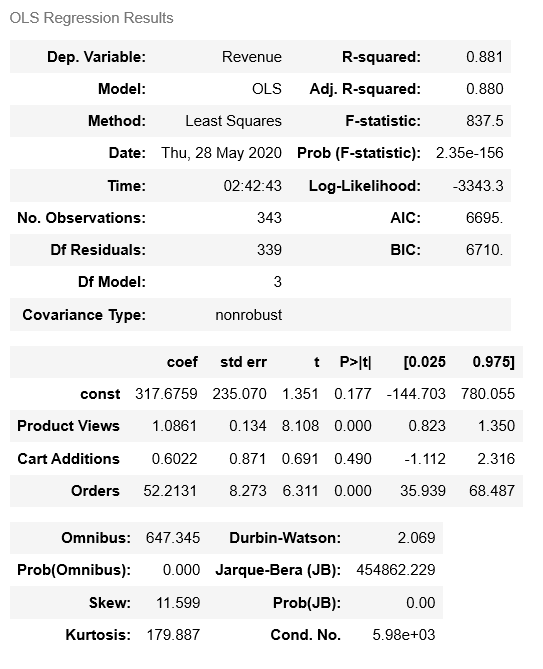 

We can also notice that with lower Omnibus and  thus skew of our residuals,  it means our residuals in the model for Disposable Respirators only are more normally distributed than in the case of all categories of respirators lumped together. And if data are more normally distributed than not, that bodes well for our choice to run linear regression.

## Conclusions:

We can observe that in virtually all cases there is very high correlation between variables we have examined above.

Looking at the heat maps above, it's typically in a range of 0/9 to 1 (remembering that value of 1 denotes perfect correlation).
On a surface that seems like a good thing but it's a double-edged sword.
First of all, correlation close to 1 of e.g. Orders and resultant Revenue doesn't really tell us much since it stands to reason that products ordered in online checkout will generate corresponding revenue - since that's the last step in a customer's journey during online shopping.

The linear regression models built using the dataset of Respirators viewed, added to carts and purchased from November 2019 to end of March 2020 also show larger than one would desire errors - whether MAE, MSE or RMSE.

Granted, multivariate models with more observations, like it was the case above with Disposable Respirators, generate higher R-squared and lower error values, thus offering better explainability and higher accuracy.

So it's a mixed bag because such models probably have too high error rate to be robust enough for deployment into production.

Question remains how much is it fault of my methodology and how much of a contributing factor was limited size of the dataset and limited length of observation (5 months).

it could be both useful and interesting to attempt to build and run similar multivariate models on broader product range and including more variables (which could be other activities during online customer journey).

Also, an area of interest could be comparing the results of the linear regression models across different acquisition channels.

Nonentheless this exercise has revealed some interesting insights.
For instance apparently Disposable Respirators' product views have higher correlation with orders and revenue thus leading us to conclusion that clients who add disposable respirators to cart are more likely to complete the purchase successfully.
Conversely, if we observe that clients add Powered Respirators to their cart, we could offer some incentives (e.g. expedited shipping, extended warranty or maybe even some price promotion) to increase the chance they will end up buying those pricier products.
While Covid19 seemed to have peaked in the UK and in Europe for now, there is no telling if and when it might come back to British shores. it might still be useful for us to deploy certain promotions or marketing strategies, even if it is not affecting a large portion of the customer base. 